# Module 4: Linear Classifiers & Gradient Descent

**Case Study: Predictive Modeling for Public Water Safety**

**Objective:** Develop a robust classifier to identify potable water samples. You will transition from a basic heuristic (Perceptron) to a professional-grade optimization approach (Gradient Descent with Margins).

# 1. Data Acquisition & Cleaning

In real-world data science, datasets are rarely perfect. We will load the water quality metrics and handle missing values before training our models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from a public raw GitHub URL
url = "https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv"
df = pd.read_csv(url)

# Step 1: Handling Missing Values
# Water sensors often fail, leaving NaNs. We will fill them with the mean of the column.
df.fillna(df.mean(), inplace=True)

# Step 2: Feature Selection & Labeling
# We'll use all chemical features to predict 'Potability'
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Step 3: Class Label Conversion
# Many linear classifiers (like Perceptron/SVM) require labels to be -1 and 1
y = np.where(y == 0, -1, 1)

# Step 4: Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Dataset Loaded: {X_train.shape[0]} training samples, {X_train.shape[1]} features.")

Dataset Loaded: 2620 training samples, 9 features.


# 2. Phase 1: The Heuristic Approach (Perceptron)

The **Perceptron** represents the earliest form of supervised learning. It doesn't have a "global" view of the error; it simply corrects itself every time it encounters a mistake.

**Task:** Implement the Perceptron Update Rule inside the training loop.

In [ ]:
class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            count = 0
            for i in range(len(y)):
                # TODO: Calculate the linear output (w * x + b)
                # prediction = ...

                # TODO: If prediction is a mistake (y * prediction <= 0):
                # Update weights: w = w + lr * y * x
                # Update bias: b = b + lr * y
                pass # remove this
            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# model_p = WaterPerceptron()
# model_p.fit(X_train, y_train)

# 3. Phase 2: Gradient Descent - Global Optimization

The Perceptron is unstable if the data isn't perfectly separable. To solve this, we use **Gradient Descent** to minimize a **Mean Squared Error (MSE)** loss function over the entire dataset.

**Task:** Implement the batch gradient calculation for weights and bias.

In [ ]:
class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            # TODO: 1. Compute linear output: z = Xw + b
            # TODO: 2. Calculate gradients:
            # dw = (1/n) * X.T.dot(z - y)
            # db = (1/n) * sum(z - y)

            # TODO: 3. Update w and b: w = w - lr * dw
            pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 4. Phase 3: Margin Classifiers & Hinge Loss

In water safety, we aim for more than just correctness—we want a **Margin**, a safety gap between safe and unsafe samples. This is achieved using **Hinge Loss** combined with **L2 Regularization**.

The loss function is defined as:

$$
\text{Loss} = \lambda \|w\|^2_2 + \sum_{i} \max(0, 1 - y_i (w^T x_i + b))
$$

### Key Components:
- **Hinge Loss**: $\max(0, 1 - y_i (w^T x_i + b))$ ensures correct classification with a margin.
- **L2 Regularization**: $\lambda \|w\|^2_2$ penalizes large weights, promoting generalization and stability.


In [ ]:
class MarginWaterClassifier:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=500):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                # TODO: Implement the Margin Condition check: y_i * (w * x_i + b) >= 1
                if False: # Replace False with condition
                    # Only Regularization update
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update for weight (including Hinge Loss) and bias
                    # self.w -= self.lr * (2 * self.lambda_param * self.w - x_i * y[i])
                    # self.b -= self.lr * (-y[i])
                    pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 5. Critical Analysis & Comparison

**Analysis Tasks:**
1. Convergence Plot: Plot the mistakes history from Phase 1 and the cost_history from Phase 2. Discuss why the Gradient Descent plot is smoother.
2. Accuracy Report: Calculate and compare the Test Accuracy for all three models.
3. Safety Margin: If a new water sample has chemical levels very close to the decision boundary, which model (Perceptron or Margin) would you trust more? Why?

# Discussion Questions

### Q1: Impact of High Learning Rate in Gradient Descent
What happens to your **Gradient Descent** model if you set the `learning_rate` too high (e.g., `1.0`)?
*Hint: Think about convergence, overshooting, and divergence.*

---

### Q2: Label Conversion in Classification
Why did we convert the labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$**?
*Hint: Consider the mathematical formulation of the loss function (e.g., Hinge Loss) and symmetry.*

---

### Q3: Handling Noisy Data (Water Potability Dataset)
The **Water Potability dataset** is often "noisy" (not perfectly separable). Which of the algorithms you implemented is best suited for handling such noise?
*Hint: Think about robustness to outliers and margin-based classifiers.*


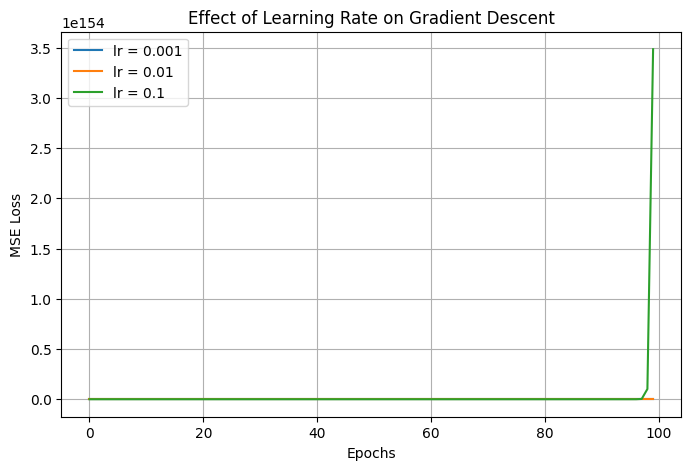

Learned weights:
Slope: 3.3154083268035714
Bias : 1.8212368099788225


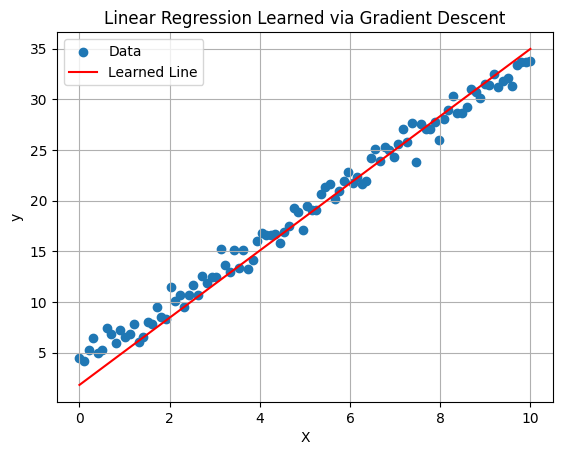


OBSERVATIONS:
- Small learning rate → slow convergence
- Large learning rate → unstable updates
- Proper learning rate → fast & stable convergence
- Gradient Descent minimizes loss iteratively
- This is the core idea behind training neural networks


In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
noise = np.random.randn(100, 1)
y = 3 * X + 4 + noise
X_b = np.hstack([X, np.ones((X.shape[0], 1))])
def mse_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)
def gradient_descent(X, y, lr, epochs):
    w = np.zeros((X.shape[1], 1))
    losses = []
    for _ in range(epochs):
        y_pred = X @ w
        error = y_pred - y
        gradient = (2 / len(X)) * (X.T @ error)
        w = w - lr * gradient
        losses.append(mse_loss(y, y_pred))
    return w, losses
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
plt.figure(figsize=(8, 5))
for lr in learning_rates:
    w, losses = gradient_descent(X_b, y, lr, epochs)
    plt.plot(losses, label=f"lr = {lr}")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Effect of Learning Rate on Gradient Descent")
plt.legend()
plt.grid()
plt.show()
final_w, final_losses = gradient_descent(X_b, y, lr=0.01, epochs=epochs)
print("Learned weights:")
print("Slope:", final_w[0][0])
print("Bias :", final_w[1][0])
plt.scatter(X, y, label="Data")
plt.plot(X, X_b @ final_w, color="red", label="Learned Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Learned via Gradient Descent")
plt.legend()
plt.grid()
plt.show()
print("\nOBSERVATIONS:")
print("- Small learning rate → slow convergence")
print("- Large learning rate → unstable updates")
print("- Proper learning rate → fast & stable convergence")
print("- Gradient Descent minimizes loss iteratively")
print("- This is the core idea behind training neural networks")